### Intensity of pixel in original images

In [1]:
import awkward as ak
from coffea import processor
from coffea.nanoevents.methods import candidate
import uproot
from coffea.nanoevents import NanoEventsFactory, BaseSchema
import json
import hist
import numpy as np
import os, glob
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use([hep.style.ROOT, hep.style.firamath])
import pickle, glob
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap

# Define the CMS color scheme
cms_colors = [
    (0.00, '#FFFFFF'),  # White
    (0.33, '#005EB8'),  # Blue
    (0.66, '#FFDD00'),  # Yellow
    (1.00, '#FF0000')   # red
]

# Create the CMS colormap
cms_cmap = LinearSegmentedColormap.from_list('CMS', cms_colors)



Matplotlib created a temporary config/cache directory at /tmp/matplotlib-ania_gjb because the default path (/uscms/home/bbbam/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [24]:
class MyProcessor(processor.ProcessorABC):
    def __init__(self):
        pass

    def process(self, events):
        # print(events.metadata)
        # dataset = events.metadata['train_dataset_1']
        dataset = events.metadata['dataset']
        # print(np.max(ak.flatten(events.BPIX_layer1_ECAL_atPV)))
        # print(np.mean(ak.flatten(events.BPIX_layer1_ECAL_atPV)))
        # plt.hist(ak.flatten(events.BPIX_layer1_ECAL_atPV))
        # HBHE_energy_padded_filled = ak.concatenate([ak.flatten(events.HBHE_energy), ak.Array([0] * (len(ak.flatten(events.ECAL_energy)) - len(ak.flatten(events.HBHE_energy))))], axis=0)
        # HBHE_energy_padded_filled = ak.fill_none(HBHE_energy_padded, 0)
        # print("HCAL_energy len --------------------",len(ak.flatten(events.HBHE_energy)),len(HBHE_energy_padded_filled))
        
        img = ak.zip(
            {
                
                "ECAL_tracksPt_atECALfixIP":ak.flatten(events.ECAL_tracksPt_atECALfixIP),
                "ECAL_tracksDzSig_atECALfixIP":ak.flatten(events.ECAL_tracksDzSig_atECALfixIP),
                "ECAL_tracksD0Sig_atECALfixIP":ak.flatten(events.ECAL_tracksD0Sig_atECALfixIP),
                "ECAL_energy":ak.flatten(events.ECAL_energy),
                "HBHE_energy":ak.concatenate([ak.flatten(events.HBHE_energy), ak.Array([0] * (len(ak.flatten(events.ECAL_energy)) - len(ak.flatten(events.HBHE_energy))))], axis=0),
                "BPIX_layer1_ECAL_atPV": ak.flatten(events.BPIX_layer1_ECAL_atPV),
                "BPIX_layer2_ECAL_atPV": ak.flatten(events.BPIX_layer2_ECAL_atPV),
                "BPIX_layer3_ECAL_atPV": ak.flatten(events.BPIX_layer3_ECAL_atPV),
                "BPIX_layer4_ECAL_atPV": ak.flatten(events.BPIX_layer4_ECAL_atPV),
                "TIB_layer1_ECAL_atPV": ak.flatten(events.TIB_layer1_ECAL_atPV),
                "TIB_layer2_ECAL_atPV": ak.flatten(events.TIB_layer2_ECAL_atPV),
                "TOB_layer1_ECAL_atPV": ak.flatten(events.TOB_layer1_ECAL_atPV),
                "TOB_layer2_ECAL_atPV": ak.flatten(events.TOB_layer2_ECAL_atPV),
                
                
                
               
            },
            with_name="PtEtaPhiMCandidate",
            behavior=candidate.behavior,
         
        )
        
        pt_scale    = 0.01   
        dz_scale    = 0.0005 
        d0_scale    = 0.002
        ecal_scale  = 0.02
        hcal_scale  = 0.02
        pix_scale = 0.1
        tracker_scale = 0.05

        
        pt = img.ECAL_tracksPt_atECALfixIP
        pt_scaled = pt[pt<100]
        dz = img.ECAL_tracksDzSig_atECALfixIP
        dz_scaled = dz[abs(dz)<2000]
        d0 = img.ECAL_tracksD0Sig_atECALfixIP
        d0_scaled = d0[abs(d0)<1000]
        ecal = img.ECAL_energy
        ecal_scaled = ecal[ecal<50]
        hcal = img.HBHE_energy
        hcal_scaled = hcal[hcal<50]
        bpix1 = img.BPIX_layer1_ECAL_atPV
        bpix1_scaled = bpix1[bpix1<10]
        bpix2 = img.BPIX_layer2_ECAL_atPV
        bpix2_scaled = bpix2[bpix2<10]
        bpix3 = img.BPIX_layer3_ECAL_atPV
        bpix3_scaled = bpix3[bpix3<10]
        bpix4 = img.BPIX_layer4_ECAL_atPV
        bpix4_scaled = bpix4[bpix4<10]
        tib1 = img.TIB_layer1_ECAL_atPV
        tib1_scaled = tib1[tib1 < 20]
        tib2 = img.TIB_layer2_ECAL_atPV
        tib2_scaled = tib2[tib2 < 20]
        tOb1 = img.TOB_layer1_ECAL_atPV
        tOb1_scaled = tOb1[tOb1 < 20]
        tOb2 = img.TOB_layer2_ECAL_atPV
        tOb2_scaled = tOb2[tOb2 < 20]

        
        
        
        
        
        # ECAL_tracksPt_atECALfixIP -----------------------------------------------------------
        
        ECAL_tracksPt_atECALfixIP_ = (
            hist.Hist.new
            .StrCat([ "ECAL_tracksPt_atECALfixIP"], name="haeta")
            .Reg(100, 0, 1200, name="eta_a", label="ECAL_tracksPt_atECALfixIP")
            .Int64()
        )
        
        ECAL_tracksPt_atECALfixIP_.fill(haeta="ECAL_tracksPt_atECALfixIP", eta_a=pt)
        
        
        ECAL_tracksPt_atECALfixIP_scaled_ = (
            hist.Hist.new
            .StrCat([ "ECAL_tracksPt_atECALfixIP"], name="haeta")
            .Reg(100, 0, 500, name="eta_a", label="ECAL_tracksPt_atECALfixIP")
            .Int64()
        )
        
        ECAL_tracksPt_atECALfixIP_scaled_.fill(haeta="ECAL_tracksPt_atECALfixIP", eta_a=pt_scaled)
       
         # ECAL_tracksDzSig_atECALfixIP -----------------------------------------------------------
        
        ECAL_tracksDzSig_atECALfixIP_ = (
            hist.Hist.new
            .StrCat([ "ECAL_tracksDzSig_atECALfixIP"], name="haphi")
            .Reg(100,-25, 25, name="phi_a", label="ECAL_tracksDzSig_atECALfixIP")
            .Int64()
        )
        
        ECAL_tracksDzSig_atECALfixIP_.fill(haphi="ECAL_tracksDzSig_atECALfixIP", phi_a=dz)
        
        ECAL_tracksDzSig_atECALfixIP_scaled_ = (
            hist.Hist.new
            .StrCat([ "ECAL_tracksDzSig_atECALfixIP"], name="haphi")
            .Reg(100,-2000, 2000, name="phi_a", label="ECAL_tracksDzSig_atECALfixIP")
            .Int64()
        )
        
        ECAL_tracksDzSig_atECALfixIP_scaled_.fill(haphi="ECAL_tracksDzSig_atECALfixIP", phi_a=dz_scaled)
        
        
        # gen Tau1 pt -----------------------------------------------------------
        
        ECAL_tracksD0Sig_atECALfixIP_ = (
            hist.Hist.new
            .StrCat([ "ECAL_tracksD0Sig_atECALfixIP"], name="haphi")
            .Reg(100,-15, 15, name="phi_a", label="ECAL_tracksD0Sig_atECALfixIP")
            .Int64()
        )
        
        ECAL_tracksD0Sig_atECALfixIP_.fill(haphi="ECAL_tracksD0Sig_atECALfixIP", phi_a=d0)
        
        ECAL_tracksD0Sig_atECALfixIP_scaled_ = (
            hist.Hist.new
            .StrCat([ "ECAL_tracksD0Sig_atECALfixIP"], name="haphi")
            .Reg(100,-500, 500, name="phi_a", label="ECAL_tracksD0Sig_atECALfixIP")
            .Int64()
        )
        
        ECAL_tracksD0Sig_atECALfixIP_scaled_.fill(haphi="ECAL_tracksD0Sig_atECALfixIP", phi_a=d0_scaled)
        
        
        # ECAL_energy  -----------------------------------------------------------
        
        ECAL_energy_ = (
            hist.Hist.new
            .StrCat(["ECAL_energy"], name="hmassa")
            .Reg(50, 0, 1000, name="massa", label="ECAL_energy")
            .Int64()
        )
        ECAL_energy_.fill(hmassa="ECAL_energy", massa=ecal)
        
        ECAL_energy_scaled_ = (
            hist.Hist.new
            .StrCat(["ECAL_energy"], name="hmassa")
            .Reg(50, 0, 50, name="massa", label="ECAL_energy")
            .Int64()
        )
        ECAL_energy_scaled_.fill(hmassa="ECAL_energy", massa=ecal_scaled)


        # HBHE_energy  -----------------------------------------------------------
        
        HBHE_energy_ = (
            hist.Hist.new
            .StrCat([ "HBHE_energy"], name="hapt")
            .Reg(50, 0, 150, name="pt_a", label="HBHE_energy")
            .Int64()
        )
        
        HBHE_energy_.fill(hapt="HBHE_energy", pt_a=hcal)
        
        HBHE_energy_scaled_ = (
            hist.Hist.new
            .StrCat([ "HBHE_energy"], name="hapt")
            .Reg(50, 0, 50, name="pt_a", label="HBHE_energy")
            .Int64()
        )
        
        HBHE_energy_scaled_.fill(hapt="HBHE_energy", pt_a=hcal_scaled)
        
        
        # BPIX_layer1_ECAL_atPV -----------------------------------------------------------
        
        BPIX_layer1_ECAL_atPV_ = (
            hist.Hist.new
            .StrCat([ "BPIX_layer1_ECAL_atPV"], name="bpix_layer1")
            .Reg(20, 0, 10, name="bpl1", label="BPIX_layer1_ECAL_atPV")
            .Int64()
        )
        
        BPIX_layer1_ECAL_atPV_.fill(bpix_layer1="BPIX_layer1_ECAL_atPV", bpl1=bpix1)
        
        BPIX_layer1_ECAL_atPV_scaled_ = (
            hist.Hist.new
            .StrCat([ "BPIX_layer1_ECAL_atPV"], name="bpix_layer1")
            .Reg(20, 0, 10, name="bpl1", label="BPIX_layer1_ECAL_atPV")
            .Int64()
        )
        
        BPIX_layer1_ECAL_atPV_scaled_.fill(bpix_layer1="BPIX_layer1_ECAL_atPV", bpl1=bpix1_scaled)
        
        # BPIX_layer2_ECAL_atPV -----------------------------------------------------------
        
        BPIX_layer2_ECAL_atPV_ = (
            hist.Hist.new
            .StrCat([ "BPIX_layer2_ECAL_atPV"], name="bpix_layer2")
            .Reg(20, 0, 10, name="bpl2", label="BPIX_layer2_ECAL_atPV")
            .Int64()
        )
        
        BPIX_layer2_ECAL_atPV_.fill(bpix_layer2="BPIX_layer2_ECAL_atPV", bpl2=bpix2)
        
        BPIX_layer2_ECAL_atPV_scaled_ = (
            hist.Hist.new
            .StrCat([ "BPIX_layer2_ECAL_atPV"], name="bpix_layer2")
            .Reg(20, 0, 10, name="bpl2", label="BPIX_layer2_ECAL_atPV")
            .Int64()
        )
        
        BPIX_layer2_ECAL_atPV_scaled_.fill(bpix_layer2="BPIX_layer2_ECAL_atPV", bpl2=bpix2_scaled)
        
        # BPIX_layer3_ECAL_atPV -----------------------------------------------------------
        
        BPIX_layer3_ECAL_atPV_ = (
            hist.Hist.new
            .StrCat([ "BPIX_layer3_ECAL_atPV"], name="bpix_layer3")
            .Reg(20, 0, 10, name="bpl3", label="BPIX_layer3_ECAL_atPV")
            .Int64()
        )
        
        BPIX_layer3_ECAL_atPV_.fill(bpix_layer3="BPIX_layer3_ECAL_atPV", bpl3=bpix3)
        
        BPIX_layer3_ECAL_atPV_scaled_ = (
            hist.Hist.new
            .StrCat([ "BPIX_layer3_ECAL_atPV"], name="bpix_layer3")
            .Reg(20, 0, 10, name="bpl3", label="BPIX_layer3_ECAL_atPV")
            .Int64()
        )
        
        BPIX_layer3_ECAL_atPV_scaled_.fill(bpix_layer3="BPIX_layer3_ECAL_atPV", bpl3=bpix3_scaled)
        
        # BPIX_layer4_ECAL_atPV -----------------------------------------------------------
        
        BPIX_layer4_ECAL_atPV_ = (
            hist.Hist.new
            .StrCat([ "BPIX_layer4_ECAL_atPV"], name="bpix_layer4")
            .Reg(20, 0, 10, name="bpl4", label="BPIX_layer4_ECAL_atPV")
            .Int64()
        )
        
        BPIX_layer4_ECAL_atPV_.fill(bpix_layer4="BPIX_layer4_ECAL_atPV", bpl4=bpix4)
        
        BPIX_layer4_ECAL_atPV_scaled_ = (
            hist.Hist.new
            .StrCat([ "BPIX_layer4_ECAL_atPV"], name="bpix_layer4")
            .Reg(20, 0, 10, name="bpl4", label="BPIX_layer4_ECAL_atPV")
            .Int64()
        )
        
        BPIX_layer4_ECAL_atPV_scaled_.fill(bpix_layer4="BPIX_layer4_ECAL_atPV", bpl4=bpix4_scaled)
        
        
        # TIB_layer1_ECAL_atPV -----------------------------------------------------------
        
        TIB_layer1_ECAL_atPV_ = (
            hist.Hist.new
            .StrCat([ "TIB_layer1_ECAL_atPV"], name="bpix_layer4")
            .Reg(20, 0, 20, name="bpl4", label="TIB_layer1_ECAL_atPV")
            .Int64()
        )
        
        TIB_layer1_ECAL_atPV_.fill(bpix_layer4="TIB_layer1_ECAL_atPV", bpl4=tib1)
        
        TIB_layer1_ECAL_atPV_scaled_ = (
            hist.Hist.new
            .StrCat([ "TIB_layer1_ECAL_atPV"], name="bpix_layer4")
            .Reg(20, 0, 20, name="bpl4", label="TIB_layer1_ECAL_atPV")
            .Int64()
        )
        
        TIB_layer1_ECAL_atPV_scaled_.fill(bpix_layer4="TIB_layer1_ECAL_atPV", bpl4=tib1_scaled)
        
        # TIB_layer2_ECAL_atPV -----------------------------------------------------------
        
        TIB_layer2_ECAL_atPV_ = (
            hist.Hist.new
            .StrCat([ "TIB_layer2_ECAL_atPV"], name="bpix_layer4")
            .Reg(20, 0, 20, name="bpl4", label="TIB_layer2_ECAL_atPV")
            .Int64()
        )
        
        TIB_layer2_ECAL_atPV_.fill(bpix_layer4="TIB_layer2_ECAL_atPV", bpl4=tib2)
        
        TIB_layer2_ECAL_atPV_scaled_ = (
            hist.Hist.new
            .StrCat([ "TIB_layer2_ECAL_atPV"], name="bpix_layer4")
            .Reg(20, 0, 20, name="bpl4", label="TIB_layer2_ECAL_atPV")
            .Int64()
        )
        
        TIB_layer2_ECAL_atPV_scaled_.fill(bpix_layer4="TIB_layer2_ECAL_atPV", bpl4=tib2_scaled)
        
        
        # TOB_layer1_ECAL_atPV -----------------------------------------------------------
        
        TOB_layer1_ECAL_atPV_ = (
            hist.Hist.new
            .StrCat([ "TOB_layer1_ECAL_atPV"], name="bpix_layer4")
            .Reg(20, 0, 20, name="bpl4", label="TOB_layer1_ECAL_atPV")
            .Int64()
        )
        
        TOB_layer1_ECAL_atPV_.fill(bpix_layer4="TOB_layer1_ECAL_atPV", bpl4=tib1)
        
        TOB_layer1_ECAL_atPV_scaled_ = (
            hist.Hist.new
            .StrCat([ "TOB_layer1_ECAL_atPV"], name="bpix_layer4")
            .Reg(20, 0, 20, name="bpl4", label="TOB_layer1_ECAL_atPV")
            .Int64()
        )
        
        TOB_layer1_ECAL_atPV_scaled_.fill(bpix_layer4="TOB_layer1_ECAL_atPV", bpl4=tib1_scaled)
        
        # TOB_layer2_ECAL_atPV -----------------------------------------------------------
        
        TOB_layer2_ECAL_atPV_ = (
            hist.Hist.new
            .StrCat([ "TOB_layer2_ECAL_atPV"], name="bpix_layer4")
            .Reg(20, 0, 20, name="bpl4", label="TOB_layer2_ECAL_atPV")
            .Int64()
        )
        
        TOB_layer2_ECAL_atPV_.fill(bpix_layer4="TOB_layer2_ECAL_atPV", bpl4=tib2)
        
        TOB_layer2_ECAL_atPV_scaled_ = (
            hist.Hist.new
            .StrCat([ "TOB_layer2_ECAL_atPV"], name="bpix_layer4")
            .Reg(20, 0, 20, name="bpl4", label="TOB_layer2_ECAL_atPV")
            .Int64()
        )
        
        TOB_layer2_ECAL_atPV_scaled_.fill(bpix_layer4="TOB_layer2_ECAL_atPV", bpl4=tib2_scaled)

        

            
     
        #----------------------------------------------------------------------------------
        
       
        
        
        
        return {
            dataset: {
                "entries": len(events),
                "ECAL_tracksPt_atECALfixIP":ECAL_tracksPt_atECALfixIP_,
                "ECAL_tracksPt_atECALfixIP_scaled":ECAL_tracksPt_atECALfixIP_scaled_,
                "ECAL_tracksDzSig_atECALfixIP":ECAL_tracksDzSig_atECALfixIP_,
                "ECAL_tracksDzSig_atECALfixIP_scaled":ECAL_tracksDzSig_atECALfixIP_scaled_,
                "ECAL_tracksD0Sig_atECALfixIP":ECAL_tracksD0Sig_atECALfixIP_,
                "ECAL_tracksD0Sig_atECALfixIP_scaled":ECAL_tracksD0Sig_atECALfixIP_scaled_,
                "ECAL_energy":ECAL_energy_,
                "ECAL_energy_scaled":ECAL_energy_scaled_,
                "HBHE_energy":HBHE_energy_,
                "HBHE_energy_scaled":HBHE_energy_scaled_,
                "BPIX_layer1_ECAL_atPV":BPIX_layer1_ECAL_atPV_,
                "BPIX_layer1_ECAL_atPV_scaled":BPIX_layer1_ECAL_atPV_scaled_,
                "BPIX_layer2_ECAL_atPV":BPIX_layer2_ECAL_atPV_,
                "BPIX_layer2_ECAL_atPV_scaled":BPIX_layer2_ECAL_atPV_scaled_,
                "BPIX_layer3_ECAL_atPV":BPIX_layer3_ECAL_atPV_,
                "BPIX_layer3_ECAL_atPV_scaled":BPIX_layer3_ECAL_atPV_scaled_,
                "BPIX_layer4_ECAL_atPV":BPIX_layer4_ECAL_atPV_,
                "BPIX_layer4_ECAL_atPV_scaled":BPIX_layer4_ECAL_atPV_scaled_,
                "TIB_layer1_ECAL_atPV":TIB_layer1_ECAL_atPV_,
                "TIB_layer1_ECAL_atPV_scaled":TIB_layer1_ECAL_atPV_scaled_,
                "TIB_layer2_ECAL_atPV":TIB_layer2_ECAL_atPV_,
                "TIB_layer2_ECAL_atPV_scaled":TIB_layer2_ECAL_atPV_scaled_,
                "TOB_layer1_ECAL_atPV":TOB_layer1_ECAL_atPV_,
                "TOB_layer1_ECAL_atPV_scaled":TOB_layer1_ECAL_atPV_scaled_,
                "TOB_layer2_ECAL_atPV":TOB_layer2_ECAL_atPV_,
                "TOB_layer2_ECAL_atPV_scaled":TOB_layer2_ECAL_atPV_scaled_,
                
               
                
              
               
            }
        }

    def postprocess(self, accumulator):
        pass

In [25]:
# filename = 'root://cmseos.fnal.gov//store/group/lpcml/bbbam/Ntuples_v2/aToTauTau_Hadronic_tauDR0p4_m14To17p2_pT30To180_ctau0To3_eta0To2p4_pythia8_dataset_2/aToTauTau_Hadronic_tauDR0p4_m14p8To17p2_eta0To2p4_pythia8_unbiased4ML_v2_dataset_2/230826_063114/0000/output_995.root'
# file = uproot.open(filename)
# events = NanoEventsFactory.from_root(
#     file,
#     treepath='/fevt/RHTree',
#     # "RHTree",
#     entry_start=None,
#     # entry_stop=1,
#     metadata={"train_dataset_1": "img"},
#     schemaclass=BaseSchema,
# ).events()
# p = MyProcessor()
# out = p.process(events)
# out

In [26]:
with open("ATo2Tau_m3p6To18_pt30To300_0009.json", "r") as fin:
    file_list_train1 = json.load(fin) 

fileset = {
    'img': file_list_train1 
    
                  
}


In [27]:
futures_run = processor.Runner(
    executor = processor.FuturesExecutor(compression=None, workers=2),
    schema=BaseSchema,
    maxchunks=5,
)

out = futures_run(
    fileset,
    treename='/fevt/RHTree',
    processor_instance=MyProcessor()
)
# Save the 'out' object to a file
with open('ATo2Tau_m3p6To18_pt30To300_0009_pixel_intensity.pkl', 'wb') as f:
    pickle.dump(out, f)

print("Output saved to ATo2Tau_m3p6To18_pt30To300_0009_pixel_intensity.pkl")

Output()

Output saved to ATo2Tau_m3p6To18_pt30To300_0009_pixel_intensity.pkl


In [ ]:
out_dir='../analysis_run3/AN_Note_Plot'
if not os.path.isdir(out_dir):
    os.makedirs(out_dir)
save = True

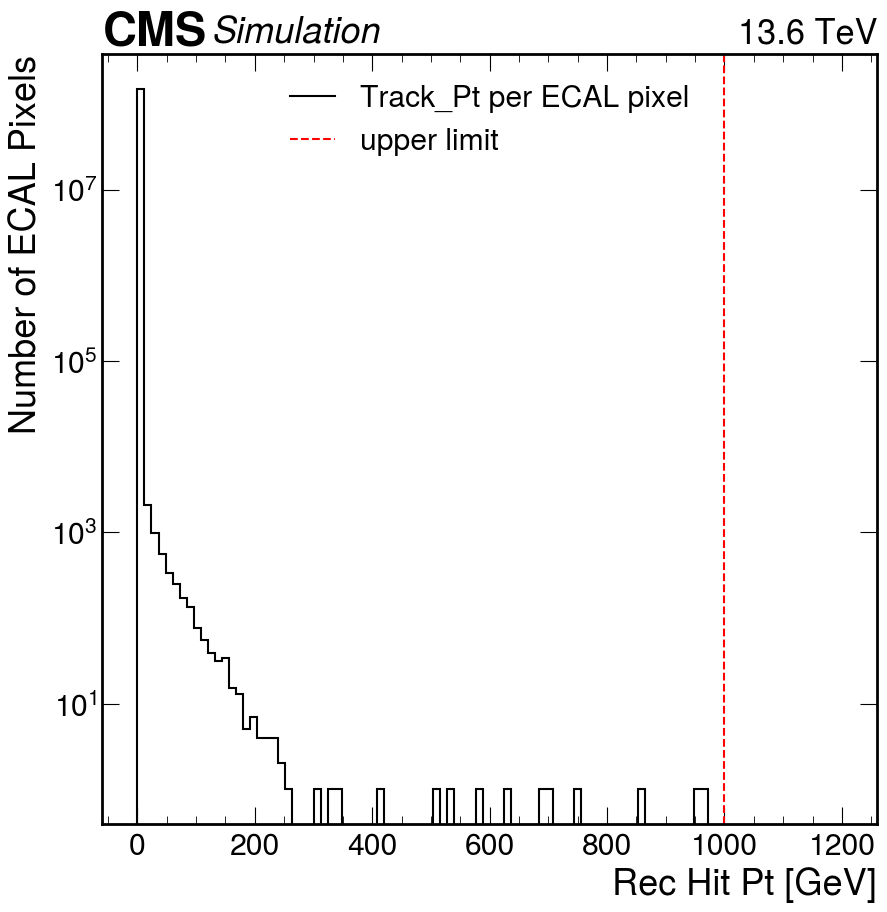

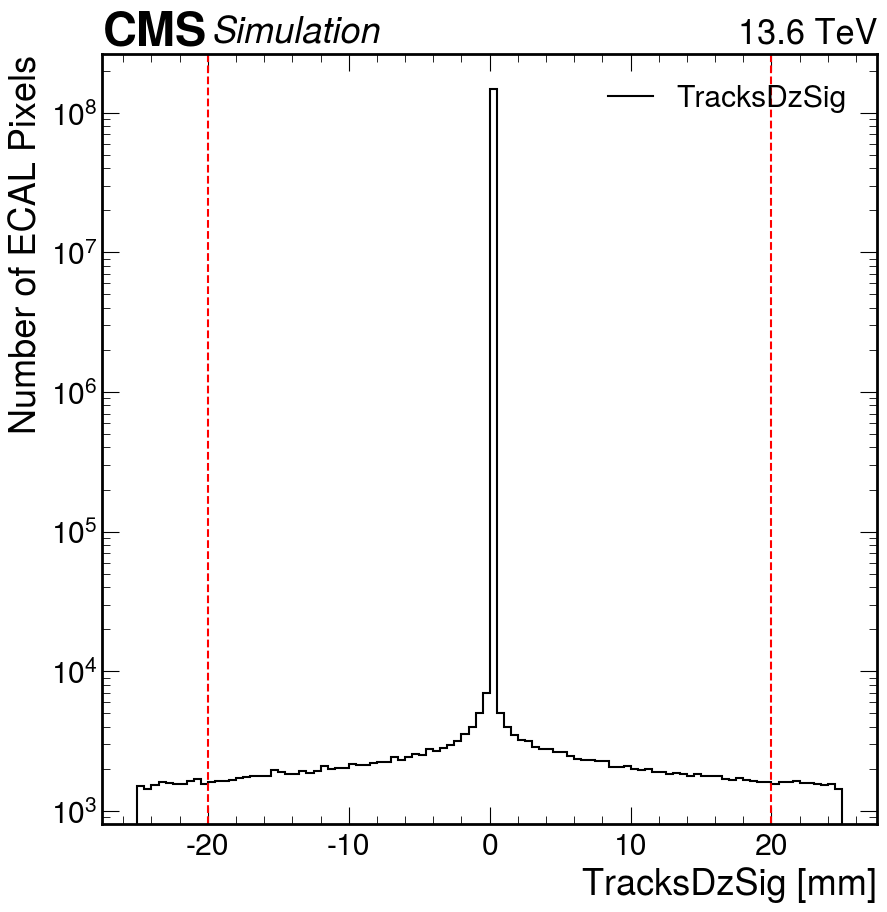

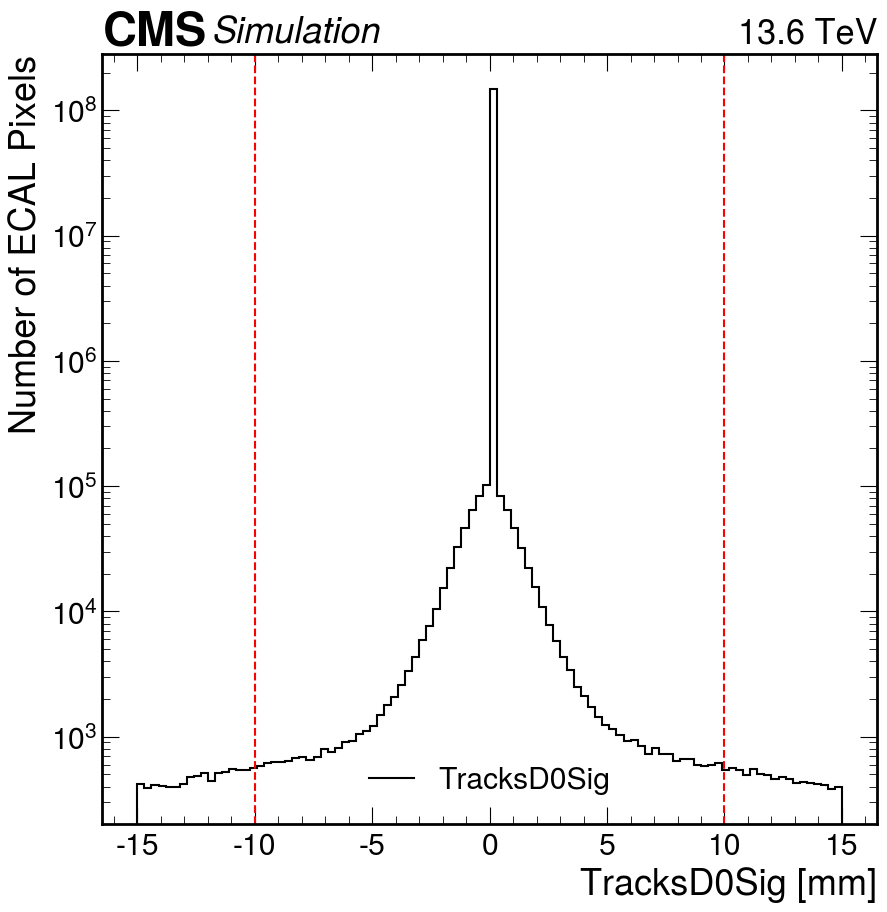

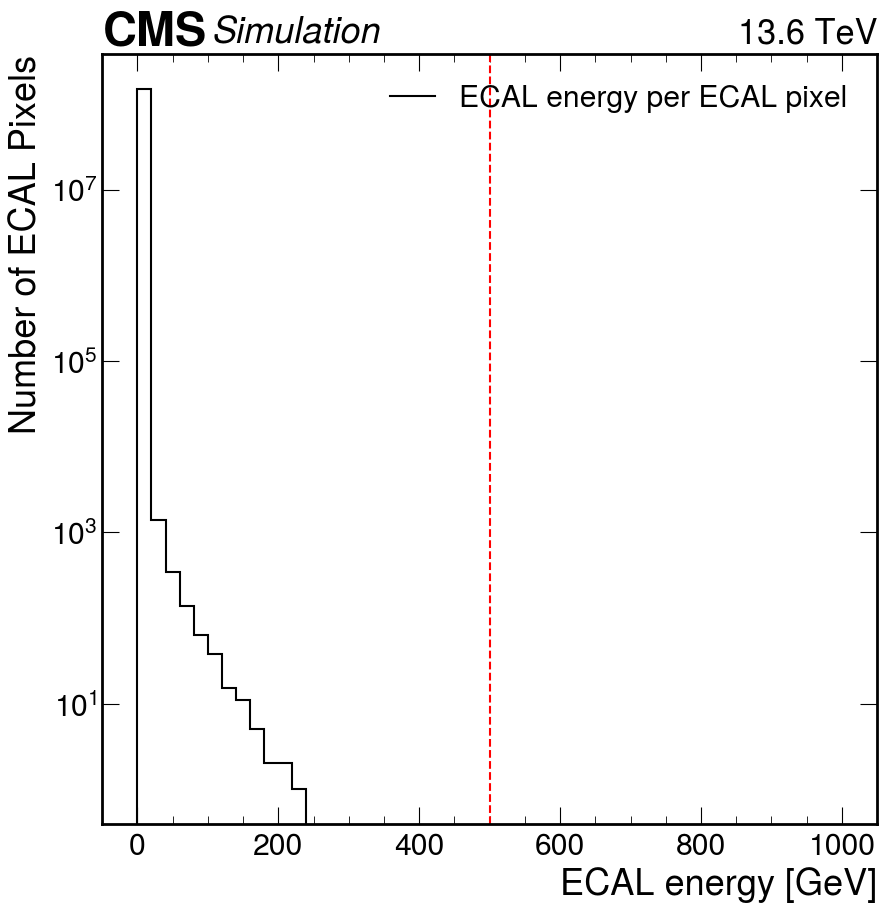

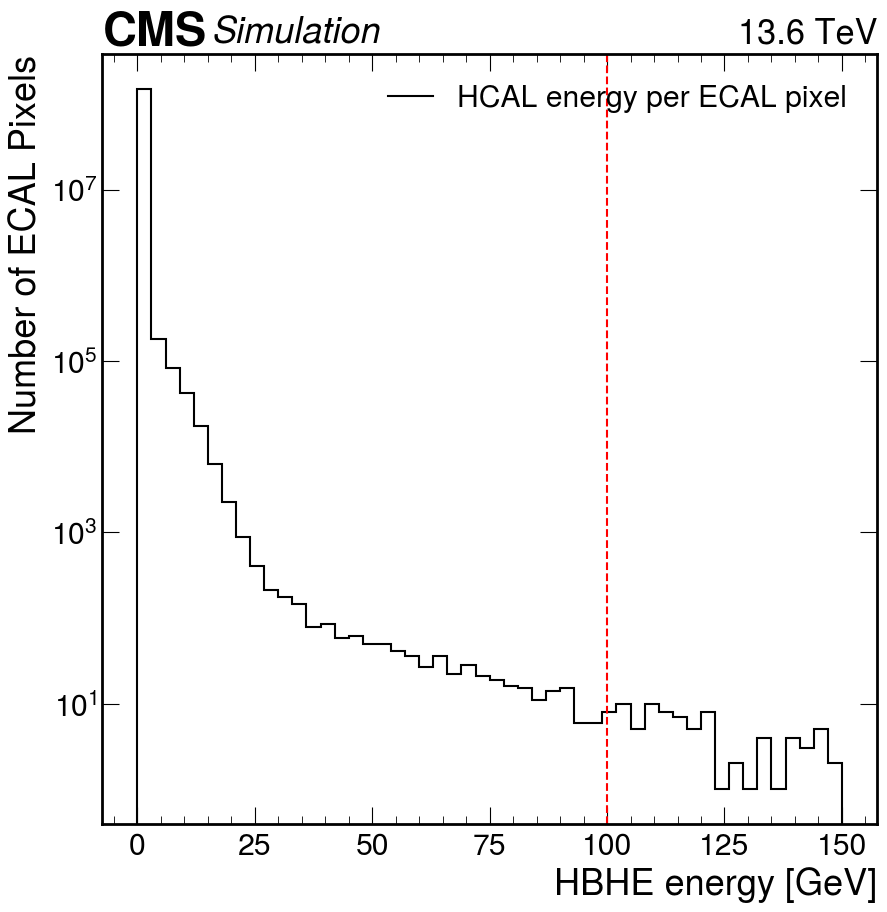

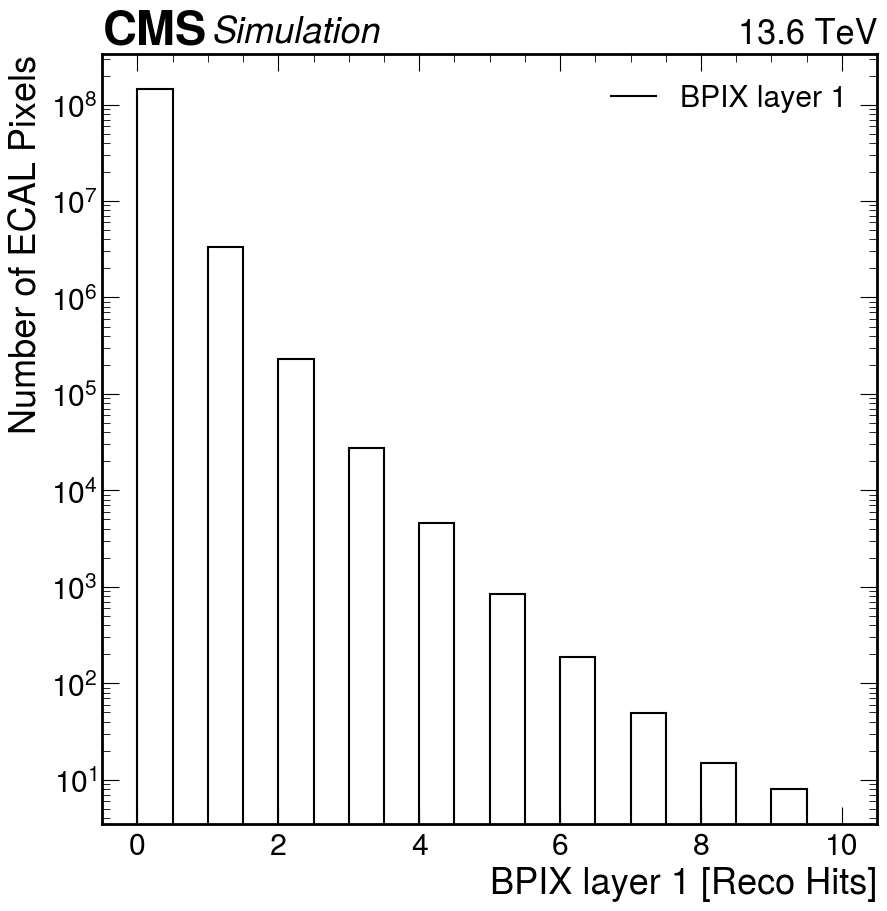

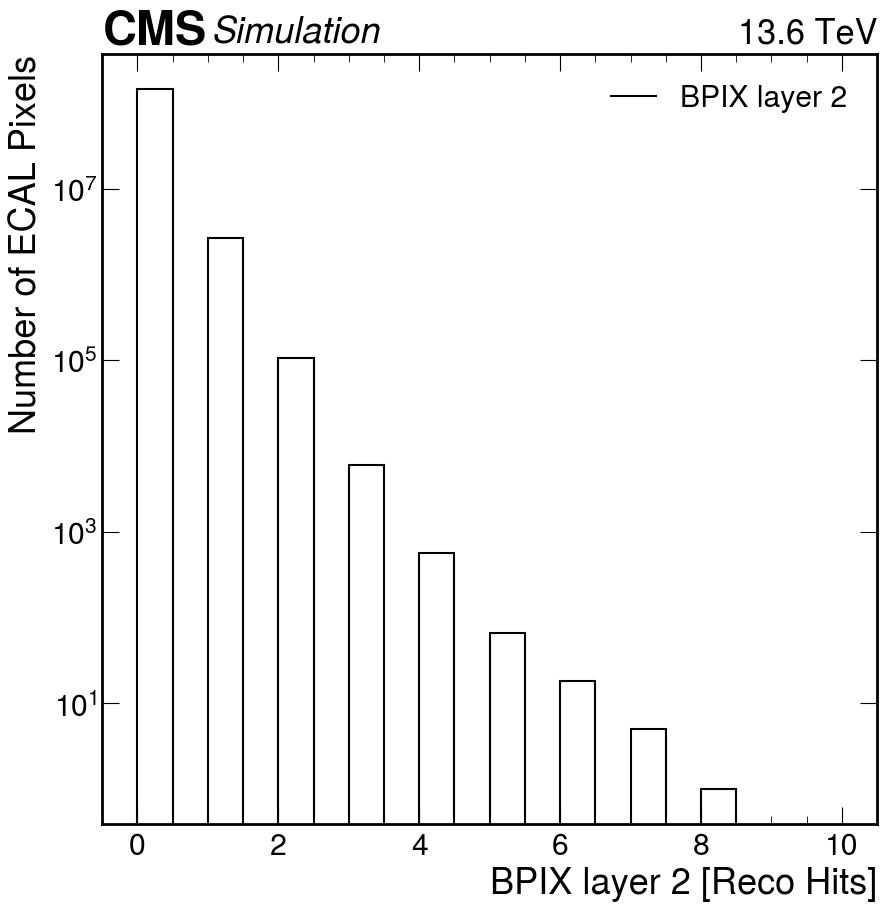

NameError: name 'dpi1300' is not defined

In [42]:
with open('ATo2Tau_m3p6To18_pt30To300_0009_pixel_intensity.pkl', 'rb') as f:
    out = pickle.load(f)


    
    
fig, ax = plt.subplots(dpi=100)
out["img"]["ECAL_tracksPt_atECALfixIP"].plot1d(ax=ax,histtype='step',color="black", label="Track_Pt per ECAL pixel")
ax.legend()
ax.set_yscale('log')
plt.xlabel("ECAL_tracksPt_atECALfixIP")
ax.set_xlabel("Rec Hit Pt [GeV]")
ax.set_ylabel("Number of ECAL Pixels")
# plt.xticks(np.arange(3.2,17.2,1.2))
ax.axvline(x=1000, color='red', linestyle='--', linewidth=1.5, label='upper limit')
hep.cms.label(llabel="Simulation", rlabel="13.6 TeV", loc=0, ax=ax)
ax.legend()
# plt.savefig(f'plots_pixel_scaled/pt.png',facecolor='w',dpi=300)
plt.show()


# fig, ax = plt.subplots()
# out["img"]["ECAL_tracksPt_atECALfixIP_scaled"].plot1d(ax=ax,histtype='step',color="black")
# ax.legend()
# ax.set_yscale('log')
# plt.xlabel("ECAL_tracksPt_atECALfixIP_scaled")
# # ax.set_xticks(np.arange(50, 0, 500), minor=True)
# # plt.xticks(np.arange(3.2,17.2,1.2))
# hep.cms.label(llabel="Simulation", rlabel="13.6 TeV", loc=0, ax=ax)
# # plt.savefig(f'plots_pixel_scaled/pt_scaled.png',facecolor='w',dpi=300)
# plt.show()


fig, ax = plt.subplots(dpi=100)
out["img"]["ECAL_tracksDzSig_atECALfixIP"].plot1d(ax=ax,histtype='step',color="black", label="TracksDzSig")
ax.legend()
ax.set_yscale('log')
plt.xlabel("TracksDzSig [mm]")
ax.set_ylabel("Number of ECAL Pixels")
ax.axvline(x=20, color='red', linestyle='--', linewidth=1.5, label='upper limit')
ax.axvline(x=-20, color='red', linestyle='--', linewidth=1.5, label='lower limit')
# ax.set_xticks(np.arange(50, 0, 500), minor=True)
# plt.xticks(np.arange(3.2,17.2,1.2))
# ax.set_xlim(-25,25)
hep.cms.label(llabel="Simulation", rlabel="13.6 TeV", loc=0, ax=ax)
# plt.savefig(f'plots_pixel_scaled/dz.png',facecolor='w',dpi=300)
plt.show()

# fig, ax = plt.subplots()
# out["img"]["ECAL_tracksDzSig_atECALfixIP_scaled"].plot1d(ax=ax,histtype='step',color="black")
# ax.legend()
# ax.set_yscale('log')
# plt.xlabel("ECAL_tracksDzSig_atECALfixIP_scaled")
# # ax.set_xticks(np.arange(50, 0, 500), minor=True)
# # plt.xticks(np.arange(3.2,17.2,1.2))
# hep.cms.label(llabel="Simulation", rlabel="13.6 TeV", loc=0, ax=ax)
# # plt.savefig(f'plots_pixel_scaled/dz_scaled.png',facecolor='w',dpi=300)
# plt.show()

fig, ax = plt.subplots(dpi=100)
out["img"]["ECAL_tracksD0Sig_atECALfixIP"].plot1d(ax=ax,histtype='step',color="black", label="TracksD0Sig")
ax.legend()
ax.set_yscale('log')
plt.xlabel("TracksD0Sig [mm]")
ax.set_ylabel("Number of ECAL Pixels")
ax.axvline(x=10, color='red', linestyle='--', linewidth=1.5, label='upper limit')
ax.axvline(x=-10, color='red', linestyle='--', linewidth=1.5, label='lower limit')
hep.cms.label(llabel="Simulation", rlabel="13.6 TeV", loc=0, ax=ax)
# plt.savefig(f'plots_pixel_scaled/d0.png',facecolor='w',dpi=300)
plt.show()

# fig, ax = plt.subplots()
# out["img"]["ECAL_tracksD0Sig_atECALfixIP_scaled"].plot1d(ax=ax,histtype='step',color="black")
# ax.legend()
# ax.set_yscale('log')
# plt.xlabel("ECAL_tracksD0Sig_atECALfixIP_scaled")
# # ax.set_xticks(np.arange(50, 0, 500), minor=True)
# # plt.xticks(np.arange(3.2,17.2,1.2))
# hep.cms.label(llabel="Simulation", rlabel="13.6 TeV", loc=0, ax=ax)
# # plt.savefig(f'plots_pixel_scaled/d0_scaled.png',facecolor='w',dpi=300)
# plt.show()

fig, ax = plt.subplots(dpi=100)
out["img"]["ECAL_energy"].plot1d(ax=ax,histtype='step',color="black", label="ECAL energy per ECAL pixel")
ax.legend()
ax.set_yscale('log')
ax.set_ylabel("Number of ECAL Pixels")
plt.xlabel("ECAL energy [GeV]")
ax.axvline(x=500, color='red', linestyle='--', linewidth=1.5, label='upper limit')
# ax.set_xticks(np.arange(50, 0, 500), minor=True)
# plt.xticks(np.arange(3.2,17.2,1.2))
hep.cms.label(llabel="Simulation", rlabel="13.6 TeV", loc=0, ax=ax)
# plt.savefig(f'plots_pixel_scaled/ecal.png',facecolor='w',dpi=300)
plt.show()


# fig, ax = plt.subplots()
# out["img"]["ECAL_energy_scaled"].plot1d(ax=ax,histtype='step',color="black")
# ax.legend()
# ax.set_yscale('log')
# plt.xlabel("ECAL_energy_scaled")
# # ax.set_xticks(np.arange(50, 0, 500), minor=True)
# # plt.xticks(np.arange(3.2,17.2,1.2))
# hep.cms.label(llabel="Simulation", rlabel="13.6 TeV", loc=0, ax=ax)
# # plt.savefig(f'plots_pixel_scaled/ecal_scaled.png',facecolor='w',dpi=300)
# plt.show()


fig, ax = plt.subplots(dpi=100)
out["img"]["HBHE_energy"].plot1d(ax=ax,histtype='step',color="black", label="HCAL energy per ECAL pixel")
ax.legend()
ax.set_yscale('log')
ax.set_ylabel("Number of ECAL Pixels")
plt.xlabel("HBHE energy [GeV]")
ax.axvline(x=100, color='red', linestyle='--', linewidth=1.5, label='upper limit')
# ax.set_xticks(np.arange(50, 0, 500), minor=True)
# plt.xticks(np.arange(3.2,17.2,1.2))
hep.cms.label(llabel="Simulation", rlabel="13.6 TeV", loc=0, ax=ax)
# plt.savefig(f'plots_pixel_scaled/hcal.png',facecolor='w',dpi=300)
plt.show()

# fig, ax = plt.subplots()
# out["img"]["HBHE_energy_scaled"].plot1d(ax=ax,histtype='step',color="black")
# ax.legend()
# ax.set_yscale('log')
# plt.xlabel("HBHE_energy_scaled")
# # ax.set_xticks(np.arange(50, 0, 500), minor=True)
# # plt.xticks(np.arange(3.2,17.2,1.2))
# hep.cms.label(llabel="Simulation", rlabel="13.6 TeV", loc=0, ax=ax)
# # plt.savefig(f'plots_pixel_scaled/hcal_scaled.png',facecolor='w',dpi=300)
# plt.show()

fig, ax = plt.subplots(dpi=100)
out["img"]["BPIX_layer1_ECAL_atPV"].plot1d(ax=ax,histtype='step',color="black", label="BPIX layer 1")
ax.legend()
ax.set_yscale('log')
ax.set_ylabel("Number of ECAL Pixels")
plt.xlabel("BPIX layer 1 [Reco Hits]")
# ax.set_xticks(np.arange(50, 0, 500), minor=True)
# plt.xticks(np.arange(3.2,17.2,1.2))
hep.cms.label(llabel="Simulation", rlabel="13.6 TeV", loc=0, ax=ax)
# plt.savefig(f'plots_pixel_scaled/bpix1.png',facecolor='w',dpi=300)
plt.show()

# fig, ax = plt.subplots()
# out["img"]["BPIX_layer1_ECAL_atPV_scaled"].plot1d(ax=ax,histtype='step',color="black")
# ax.legend()
# ax.set_yscale('log')
# plt.xlabel("BPIX_layer1_ECAL_atPV_scaled")
# # ax.set_xticks(np.arange(50, 0, 500), minor=True)
# # plt.xticks(np.arange(3.2,17.2,1.2))
# hep.cms.label(llabel="Simulation", rlabel="13.6 TeV", loc=0, ax=ax)
# # plt.savefig(f'plots_pixel_scaled/bpix1_scaled.png',facecolor='w',dpi=300)
# plt.show()

fig, ax = plt.subplots(dpi=100)
out["img"]["BPIX_layer2_ECAL_atPV"].plot1d(ax=ax,histtype='step',color="black", label="BPIX layer 2")
ax.legend()
ax.set_yscale('log')
ax.set_ylabel("Number of ECAL Pixels")
plt.xlabel("BPIX layer 2 [Reco Hits]")
# ax.set_xticks(np.arange(50, 0, 500), minor=True)
# plt.xticks(np.arange(3.2,17.2,1.2))
hep.cms.label(llabel="Simulation", rlabel="13.6 TeV", loc=0, ax=ax)
# plt.savefig(f'plots_pixel_scaled/bpix2.png',facecolor='w',dpi=300)
plt.show()


# fig, ax = plt.subplots()
# out["img"]["BPIX_layer2_ECAL_atPV_scaled"].plot1d(ax=ax,histtype='step',color="black")
# ax.legend()
# ax.set_yscale('log')
# plt.xlabel("BPIX_layer2_ECAL_atPV_scaled")
# # ax.set_xticks(np.arange(50, 0, 500), minor=True)
# # plt.xticks(np.arange(3.2,17.2,1.2))
# hep.cms.label(llabel="Simulation", rlabel="13.6 TeV", loc=0, ax=ax)
# # plt.savefig(f'plots_pixel_scaled/bpix2_scaled.png',facecolor='w',dpi=300)
# plt.show() 

fig, ax = plt.subplots(dpi1300)
out["img"]["BPIX_layer3_ECAL_atPV"].plot1d(ax=ax,histtype='step',color="black", label="BPIX layer 3")
ax.legend()
ax.set_yscale('log')
ax.set_ylabel("Number of ECAL Pixels")
plt.xlabel("BPIX layer 3 [Reco Hits]")
# ax.set_xticks(np.arange(50, 0, 500), minor=True)
# plt.xticks(np.arange(3.2,17.2,1.2))
hep.cms.label(llabel="Simulation", rlabel="13.6 TeV", loc=0, ax=ax)
# plt.savefig(f'plots_pixel_scaled/bpix3.png',facecolor='w',dpi=300)
plt.show()

# fig, ax = plt.subplots()
# out["img"]["BPIX_layer3_ECAL_atPV_scaled"].plot1d(ax=ax,histtype='step',color="black")
# ax.legend()
# ax.set_yscale('log')
# plt.xlabel("BPIX_layer3_ECAL_atPV_scaled")
# # ax.set_xticks(np.arange(50, 0, 500), minor=True)
# # plt.xticks(np.arange(3.2,17.2,1.2))
# hep.cms.label(llabel="Simulation", rlabel="13.6 TeV", loc=0, ax=ax)
# # plt.savefig(f'plots_pixel_scaled/bpix3_scaled.png',facecolor='w',dpi=300)
# plt.show()

fig, ax = plt.subplots(dpi=100)
out["img"]["BPIX_layer4_ECAL_atPV"].plot1d(ax=ax,histtype='step',color="black", label="BPIX layer 4")
ax.legend()
ax.set_yscale('log')
ax.set_ylabel("Number of ECAL Pixels")
plt.xlabel("BPIX layer 4 [Reco Hits]")
# ax.set_xticks(np.arange(50, 0, 500), minor=True)
# plt.xticks(np.arange(3.2,17.2,1.2))
hep.cms.label(llabel="Simulation", rlabel="13.6 TeV", loc=0, ax=ax)
# plt.savefig(f'plots_pixel_scaled/bpix4.png',facecolor='w',dpi=300)
plt.show()

# fig, ax = plt.subplots()
# out["img"]["BPIX_layer4_ECAL_atPV_scaled"].plot1d(ax=ax,histtype='step',color="black")
# ax.legend()
# ax.set_yscale('log')
# plt.xlabel("BPIX_layer4_ECAL_atPV_scaled")
# # ax.set_xticks(np.arange(50, 0, 500), minor=True)
# # plt.xticks(np.arange(3.2,17.2,1.2))
# hep.cms.label(llabel="Simulation", rlabel="13.6 TeV", loc=0, ax=ax)
# # plt.savefig(f'plots_pixel_scaled/bpix4_scaled.png',facecolor='w',dpi=300)
# plt.show()

fig, ax = plt.subplots(dpi=100)
out["img"]["TIB_layer1_ECAL_atPV"].plot1d(ax=ax,histtype='step',color="black", label="TIB layer 1")
ax.legend()
ax.set_yscale('log')
ax.set_ylabel("Number of ECAL Pixels")
plt.xlabel("TIB layer 1 [Reco Hits]")
# ax.set_xticks(np.arange(50, 0, 500), minor=True)
# plt.xticks(np.arange(3.2,17.2,1.2))
hep.cms.label(llabel="Simulation", rlabel="13.6 TeV", loc=0, ax=ax)
# plt.savefig(f'plots_pixel_scaled/tib1.png',facecolor='w',dpi=300)
plt.show()

# fig, ax = plt.subplots()
# out["img"]["TIB_layer1_ECAL_atPV_scaled"].plot1d(ax=ax,histtype='step',color="black")
# ax.legend()
# ax.set_yscale('log')
# plt.xlabel("TIB_layer1_ECAL_atPV_scaled")
# # ax.set_xticks(np.arange(50, 0, 500), minor=True)
# # plt.xticks(np.arange(3.2,17.2,1.2))
# hep.cms.label(llabel="Simulation", rlabel="13.6 TeV", loc=0, ax=ax)
# # plt.savefig(f'plots_pixel_scaled/tib1_scaled.png',facecolor='w',dpi=300)
# plt.show()

fig, ax = plt.subplots(dpi=100)
out["img"]["TIB_layer2_ECAL_atPV"].plot1d(ax=ax,histtype='step',color="black", label="TIB layer 2")
ax.legend()
ax.set_yscale('log')
ax.set_ylabel("Number of ECAL Pixels")
plt.xlabel("TIB layer 2 [Reco Hits]")
# ax.set_xticks(np.arange(50, 0, 500), minor=True)
# plt.xticks(np.arange(3.2,17.2,1.2))
hep.cms.label(llabel="Simulation", rlabel="13.6 TeV", loc=0, ax=ax)
# plt.savefig(f'plots_pixel_scaled/tib2.png',facecolor='w',dpi=300)
plt.show()

# fig, ax = plt.subplots()
# out["img"]["TIB_layer2_ECAL_atPV_scaled"].plot1d(ax=ax,histtype='step',color="black")
# ax.legend()
# ax.set_yscale('log')
# plt.xlabel("TIB_layer2_ECAL_atPV_scaled")
# # ax.set_xticks(np.arange(50, 0, 500), minor=True)
# # plt.xticks(np.arange(3.2,17.2,1.2))
# hep.cms.label(llabel="Simulation", rlabel="13.6 TeV", loc=0, ax=ax)
# # plt.savefig(f'plots_pixel_scaled/tib2_scaled.png',facecolor='w',dpi=300)
# plt.show()

fig, ax = plt.subplots(dpi=100)
out["img"]["TOB_layer1_ECAL_atPV"].plot1d(ax=ax,histtype='step',color="black", label="TOB layer 1")
ax.legend()
ax.set_yscale('log')
ax.set_ylabel("Number of ECAL Pixels")
plt.xlabel("TOB layer 1 [Reco Hits]")
# ax.set_xticks(np.arange(50, 0, 500), minor=True)
# plt.xticks(np.arange(3.2,17.2,1.2))
hep.cms.label(llabel="Simulation", rlabel="13.6 TeV", loc=0, ax=ax)
# plt.savefig(f'plots_pixel_scaled/tob1.png',facecolor='w',dpi=300)
plt.show()

# fig, ax = plt.subplots()
# out["img"]["TOB_layer1_ECAL_atPV_scaled"].plot1d(ax=ax,histtype='step',color="black")
# ax.legend()
# ax.set_yscale('log')
# plt.xlabel("TOB_layer1_ECAL_atPV_scaled")
# # ax.set_xticks(np.arange(50, 0, 500), minor=True)
# # plt.xticks(np.arange(3.2,17.2,1.2))
# hep.cms.label(llabel="Simulation", rlabel="13.6 TeV", loc=0, ax=ax)
# # plt.savefig(f'plots_pixel_scaled/tob1_scaled.png',facecolor='w',dpi=300)
# plt.show()

fig, ax = plt.subplots(dpi=100)
out["img"]["TOB_layer2_ECAL_atPV"].plot1d(ax=ax,histtype='step',color="black", label="TOB layer 2")
ax.legend()
ax.set_yscale('log')
ax.set_ylabel("Number of ECAL Pixels")
plt.xlabel("TOB layer 2 [Reco Hits]")
# ax.set_xticks(np.arange(50, 0, 500), minor=True)
# plt.xticks(np.arange(3.2,17.2,1.2))
hep.cms.label(llabel="Simulation", rlabel="13.6 TeV", loc=0, ax=ax)
# plt.savefig(f'plots_pixel_scaled/tob2.png',facecolor='w',dpi=300)
plt.show()

# fig, ax = plt.subplots()
# out["img"]["TOB_layer2_ECAL_atPV_scaled"].plot1d(ax=ax,histtype='step',color="black")
# ax.legend()
# ax.set_yscale('log')
# plt.xlabel("TOB_layer2_ECAL_atPV_scaled")
# # ax.set_xticks(np.arange(50, 0, 500), minor=True)
# # plt.xticks(np.arange(3.2,17.2,1.2))
# hep.cms.label(llabel="Simulation", rlabel="13.6 TeV", loc=0, ax=ax)
# # plt.savefig(f'plots_pixel_scaled/tob2_scaled.png',facecolor='w',dpi=300)
# plt.show()
